In [1]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Set Pandas options to show all columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Make variable for input file
INFILE = "/Users/jck/Documents/MSDS 422/Unit 2/Assignment 2/HMEQ_Loss.csv"

# Read in the data file
df = pd.read_csv(INFILE, sep=',', header=0)

In [2]:
# Print the first 5 rows of the data frame
df.head(5)

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [3]:
# Print the data shape, such as how many rows and columns
print(df.shape)


(5960, 14)


In [4]:
# Print the data types for each column
dt = df.dtypes
print(dt)

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


In [5]:
# Print the data frame statistics
print(df.describe())

       TARGET_BAD_FLAG  TARGET_LOSS_AMT          LOAN        MORTDUE  \
count      5960.000000      1189.000000   5960.000000    5442.000000   
mean          0.199497     13414.576955  18607.969799   73760.817200   
std           0.399656     10839.455965  11207.480417   44457.609458   
min           0.000000       224.000000   1100.000000    2063.000000   
25%           0.000000      5639.000000  11100.000000   46276.000000   
50%           0.000000     11003.000000  16300.000000   65019.000000   
75%           0.000000     17634.000000  23300.000000   91488.000000   
max           1.000000     78987.000000  89900.000000  399550.000000   

               VALUE          YOJ        DEROG       DELINQ        CLAGE  \
count    5848.000000  5445.000000  5252.000000  5380.000000  5652.000000   
mean   101776.048741     8.922268     0.254570     0.449442   179.766275   
std     57385.775334     7.573982     0.846047     1.127266    85.810092   
min      8000.000000     0.000000     0.000000 

In [6]:
# Print the number of missing values for each column
missing_values  =df.isnull().sum()
print(missing_values)
# After running the above code, we can see that there are 12 columns with missing values.

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT    4771
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64


In [7]:
# Show which column is under object type and which is under numeric type
TARGET_B = "TARGET_BAD_FLAG"
TARGET_L = "TARGET_LOSS_AMT"

objList = []
numList = []
for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_B, TARGET_L ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

print(" OBJECTS ")
print(" ------- ")
for i in objList :
   print( i )
print(" ------- ")


print(" NUMBER ")
print(" ------- ")
for i in numList :
   print( i )
print(" ------- ")

 OBJECTS 
 ------- 
REASON
JOB
 ------- 
 NUMBER 
 ------- 
LOAN
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC
 ------- 


In [8]:
# My idea is insert 0 for Target Loss Amount for my first step of data cleaning
df[TARGET_L] = df[TARGET_L].fillna(0)

missing_values2  =df.isnull().sum()
print(missing_values2)
'''
After setting the Target Loss Amount to 0, there are no longer any missing values in that column. 
I chose not to impute values for Target Loss Amount because it should be 0 if the loan was repaid successfully. 
Consequently, the count of columns with missing values has decreased to 11.
'''


TARGET_BAD_FLAG       0
TARGET_LOSS_AMT       0
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
dtype: int64


'\nAfter setting the Target Loss Amount to 0, there are no longer any missing values in that column. \nI chose not to impute values for Target Loss Amount because it should be 0 if the loan was repaid successfully. \nConsequently, the count of columns with missing values has decreased to 11.\n'

In [9]:
# Next, lets handle the numeric columns with missing values

cols_with_missing = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [10]:
'''
I observed that some data points are outliers, so I plan to employ the Interquartile Range (IQR) method 
to detect these outliers and substitute them, using the median value for imputation.
'''
for col in cols_with_missing:
    # 1. Identify Outliers using the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 2. Remove Outliers - Replace outliers in a copy of the column with NaN
    temp_col = df[col].copy()
    temp_col[(temp_col < lower_bound) | (temp_col > upper_bound)] = np.nan
    
    # 3. Calculate median of the column with outliers removed
    median_val = temp_col.median()
    
    # 4. Create new column for imputed values, fill missing values with the calculated median
    df['IMP_'+col] = df[col].fillna(median_val)


In [11]:
print(df.head(5))

   TARGET_BAD_FLAG  TARGET_LOSS_AMT  LOAN  MORTDUE     VALUE   REASON     JOB  \
0                1            641.0  1100  25860.0   39025.0  HomeImp   Other   
1                1           1109.0  1300  70053.0   68400.0  HomeImp   Other   
2                1            767.0  1500  13500.0   16700.0  HomeImp   Other   
3                1           1425.0  1500      NaN       NaN      NaN     NaN   
4                0              0.0  1700  97800.0  112000.0  HomeImp  Office   

    YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  DEBTINC  IMP_MORTDUE  \
0  10.5    0.0     0.0   94.366667   1.0   9.0      NaN      25860.0   
1   7.0    0.0     2.0  121.833333   0.0  14.0      NaN      70053.0   
2   4.0    0.0     0.0  149.466667   1.0  10.0      NaN      13500.0   
3   NaN    NaN     NaN         NaN   NaN   NaN      NaN      63508.0   
4   3.0    0.0     0.0   93.333333   0.0  14.0      NaN      97800.0   

   IMP_VALUE  IMP_YOJ  IMP_DEROG  IMP_DELINQ   IMP_CLAGE  IMP_NINQ  IMP_CLNO  \


In [12]:
missing_values3  =df.isnull().sum()
print(missing_values3)
# After running the above code, we can see that there are 2 columns with missing values.

TARGET_BAD_FLAG       0
TARGET_LOSS_AMT       0
LOAN                  0
MORTDUE             518
VALUE               112
REASON              252
JOB                 279
YOJ                 515
DEROG               708
DELINQ              580
CLAGE               308
NINQ                510
CLNO                222
DEBTINC            1267
IMP_MORTDUE           0
IMP_VALUE             0
IMP_YOJ               0
IMP_DEROG             0
IMP_DELINQ            0
IMP_CLAGE             0
IMP_NINQ              0
IMP_CLNO              0
IMP_DEBTINC           0
dtype: int64


In [13]:
# Let's now address the missing values in the categorical columns.
categorical_cols_with_missing = ['REASON','JOB']

In [14]:
for col in categorical_cols_with_missing :
    # 1. Fill Missing Values as a separate category
    df['TEMP_'+col] = df[col].fillna('Missing')
    
    # 2. One-Hot Encode in the temporary column
    encoded = pd.get_dummies(df['TEMP_'+col], prefix='OHE_'+col, dtype=int)
    # print(encoded.head(5))
    # 3. Merge the new one-hot encoded columns back with df
    df = pd.concat([df, encoded], axis=1)
    
    # 4.Remove the temporary column 
    df.drop(columns='TEMP_'+col, inplace=True)

# After this loop, 'df' will have new one-hot encoded columns corresponding to each category in the original columns.

In [15]:
# Validate that all missing values have been handled
missing_values4  =df.isnull().sum()
print(missing_values4)


TARGET_BAD_FLAG          0
TARGET_LOSS_AMT          0
LOAN                     0
MORTDUE                518
VALUE                  112
REASON                 252
JOB                    279
YOJ                    515
DEROG                  708
DELINQ                 580
CLAGE                  308
NINQ                   510
CLNO                   222
DEBTINC               1267
IMP_MORTDUE              0
IMP_VALUE                0
IMP_YOJ                  0
IMP_DEROG                0
IMP_DELINQ               0
IMP_CLAGE                0
IMP_NINQ                 0
IMP_CLNO                 0
IMP_DEBTINC              0
OHE_REASON_DebtCon       0
OHE_REASON_HomeImp       0
OHE_REASON_Missing       0
OHE_JOB_Mgr              0
OHE_JOB_Missing          0
OHE_JOB_Office           0
OHE_JOB_Other            0
OHE_JOB_ProfExe          0
OHE_JOB_Sales            0
OHE_JOB_Self             0
dtype: int64


In [16]:
print(missing_values4.tail(10))
# After running the code above, I noticed we have no more missing value

OHE_REASON_DebtCon    0
OHE_REASON_HomeImp    0
OHE_REASON_Missing    0
OHE_JOB_Mgr           0
OHE_JOB_Missing       0
OHE_JOB_Office        0
OHE_JOB_Other         0
OHE_JOB_ProfExe       0
OHE_JOB_Sales         0
OHE_JOB_Self          0
dtype: int64


In [17]:
df.describe()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,IMP_MORTDUE,IMP_VALUE,IMP_YOJ,IMP_DEROG,IMP_DELINQ,IMP_CLAGE,IMP_NINQ,IMP_CLNO,IMP_DEBTINC,OHE_REASON_DebtCon,OHE_REASON_HomeImp,OHE_REASON_Missing,OHE_JOB_Mgr,OHE_JOB_Missing,OHE_JOB_Office,OHE_JOB_Other,OHE_JOB_ProfExe,OHE_JOB_Sales,OHE_JOB_Self
count,5960.000000,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,2676.163087,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,72869.716644,101496.649168,8.756166,0.224329,0.405705,179.387274,1.170134,21.247819,34.013874,0.659060,0.298658,0.042282,0.128691,0.046812,0.159060,0.400671,0.214094,0.018289,0.032383
std,0.399656,7222.631500,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746,42579.485794,56879.779380,7.259424,0.798458,1.079256,83.578832,1.653866,9.951308,7.645985,0.474065,0.457708,0.201248,0.334886,0.211254,0.365763,0.490076,0.410227,0.134004,0.177029
min,0.000000,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262,63508.000000,88310.500000,7.000000,0.000000,0.000000,172.432355,1.000000,20.000000,34.880462,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,78987.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# After filling all the missing values, I want to compare the IMP value and the original value in histogram. 


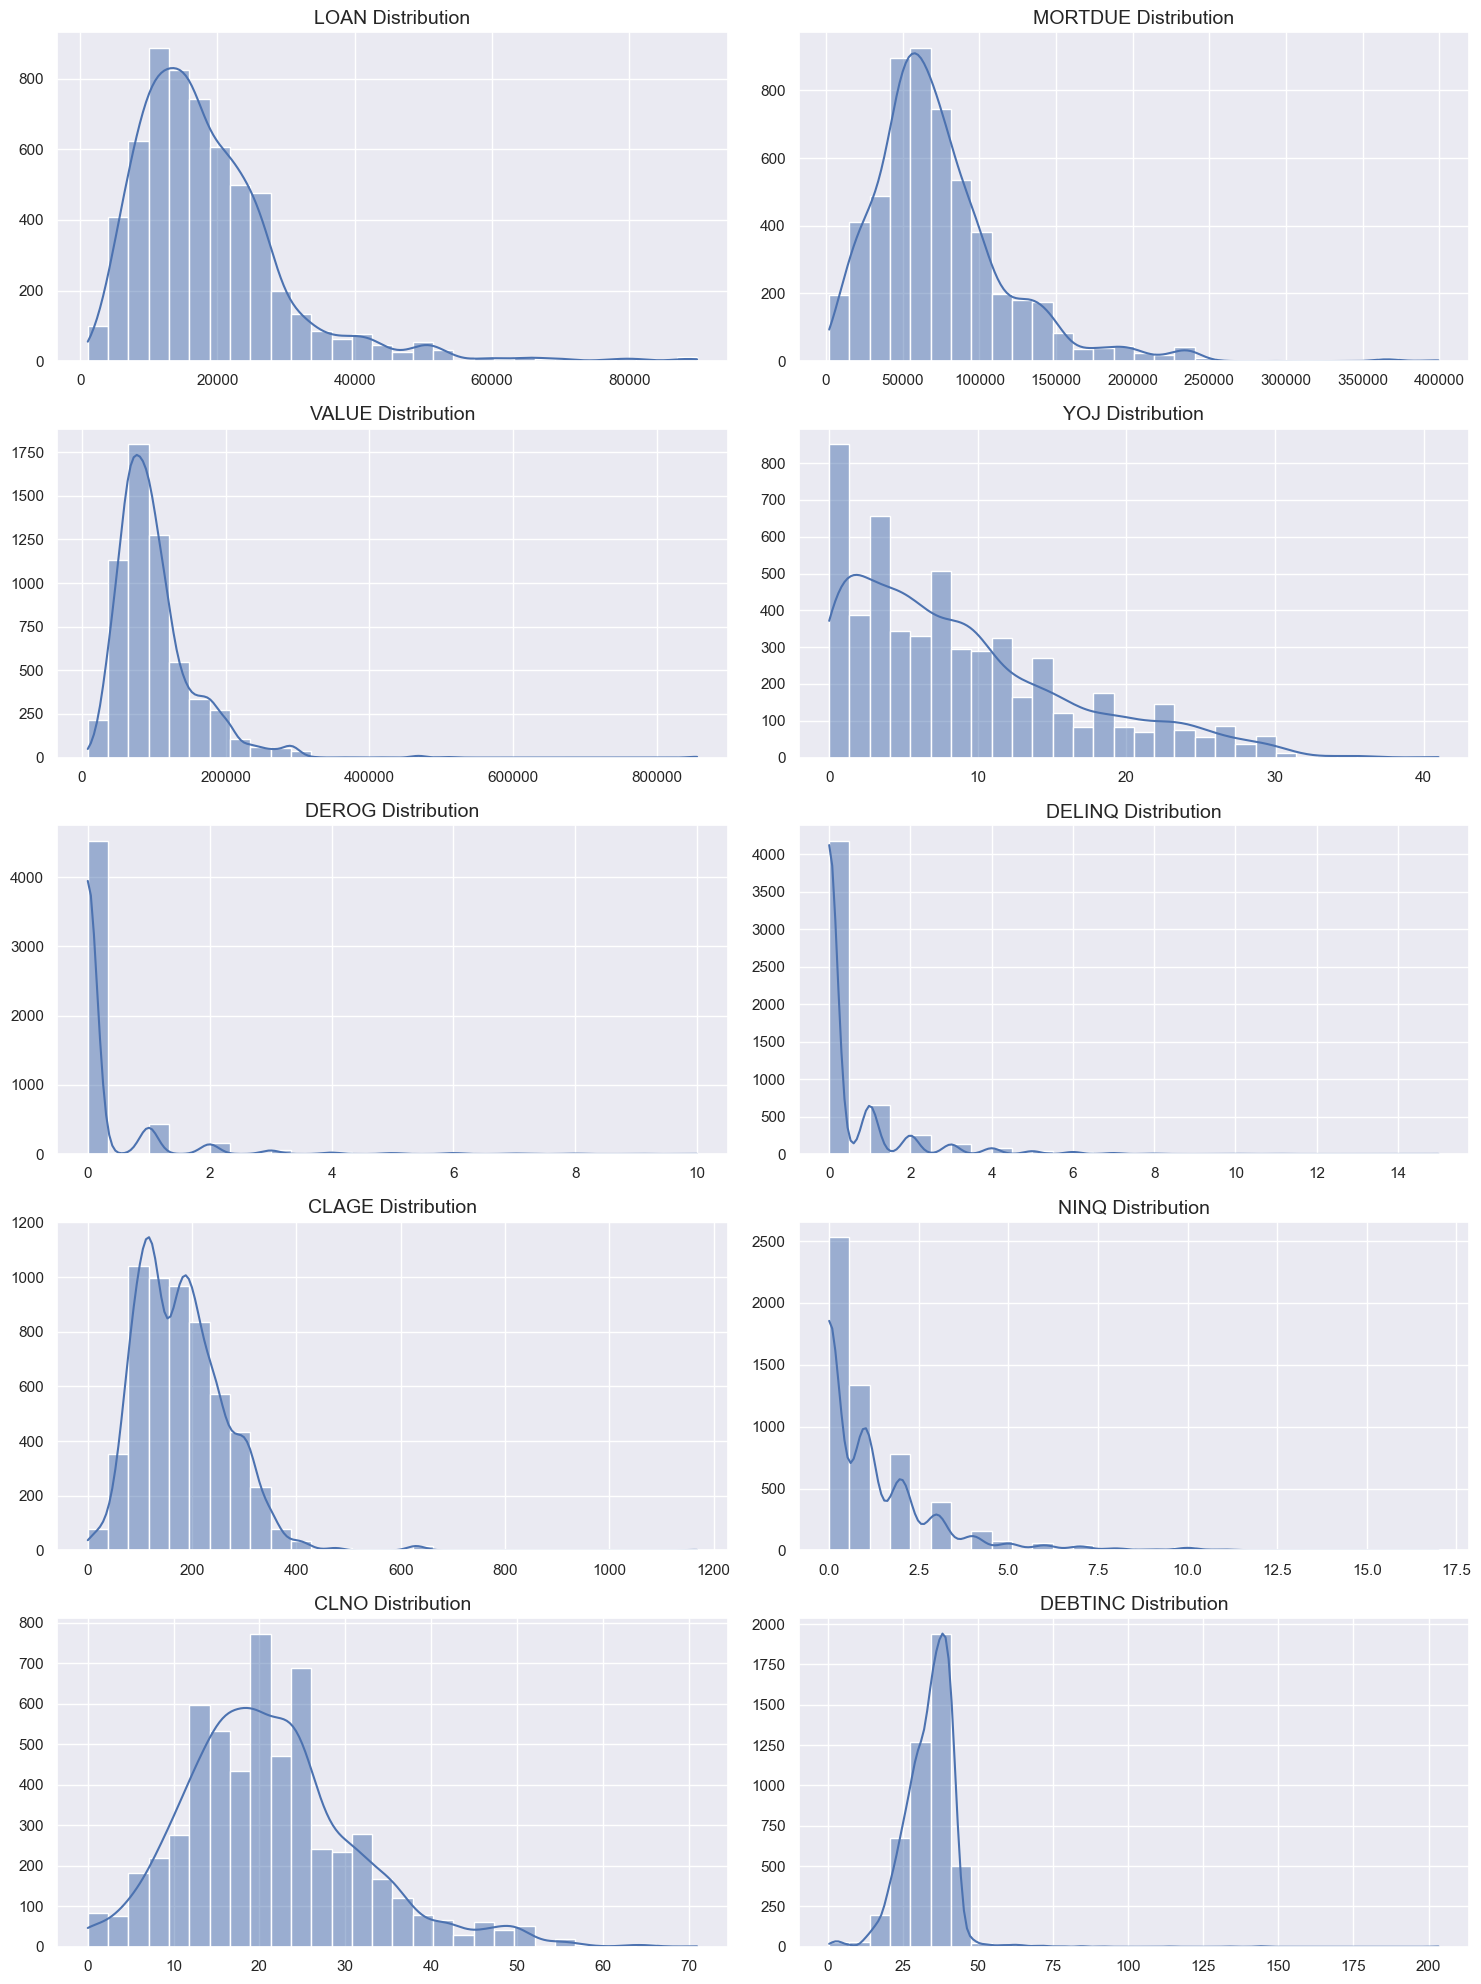

In [18]:
# The list of key numerical variables for visualization
numerical_vars = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Initialize the subplot function using matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(var + ' Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

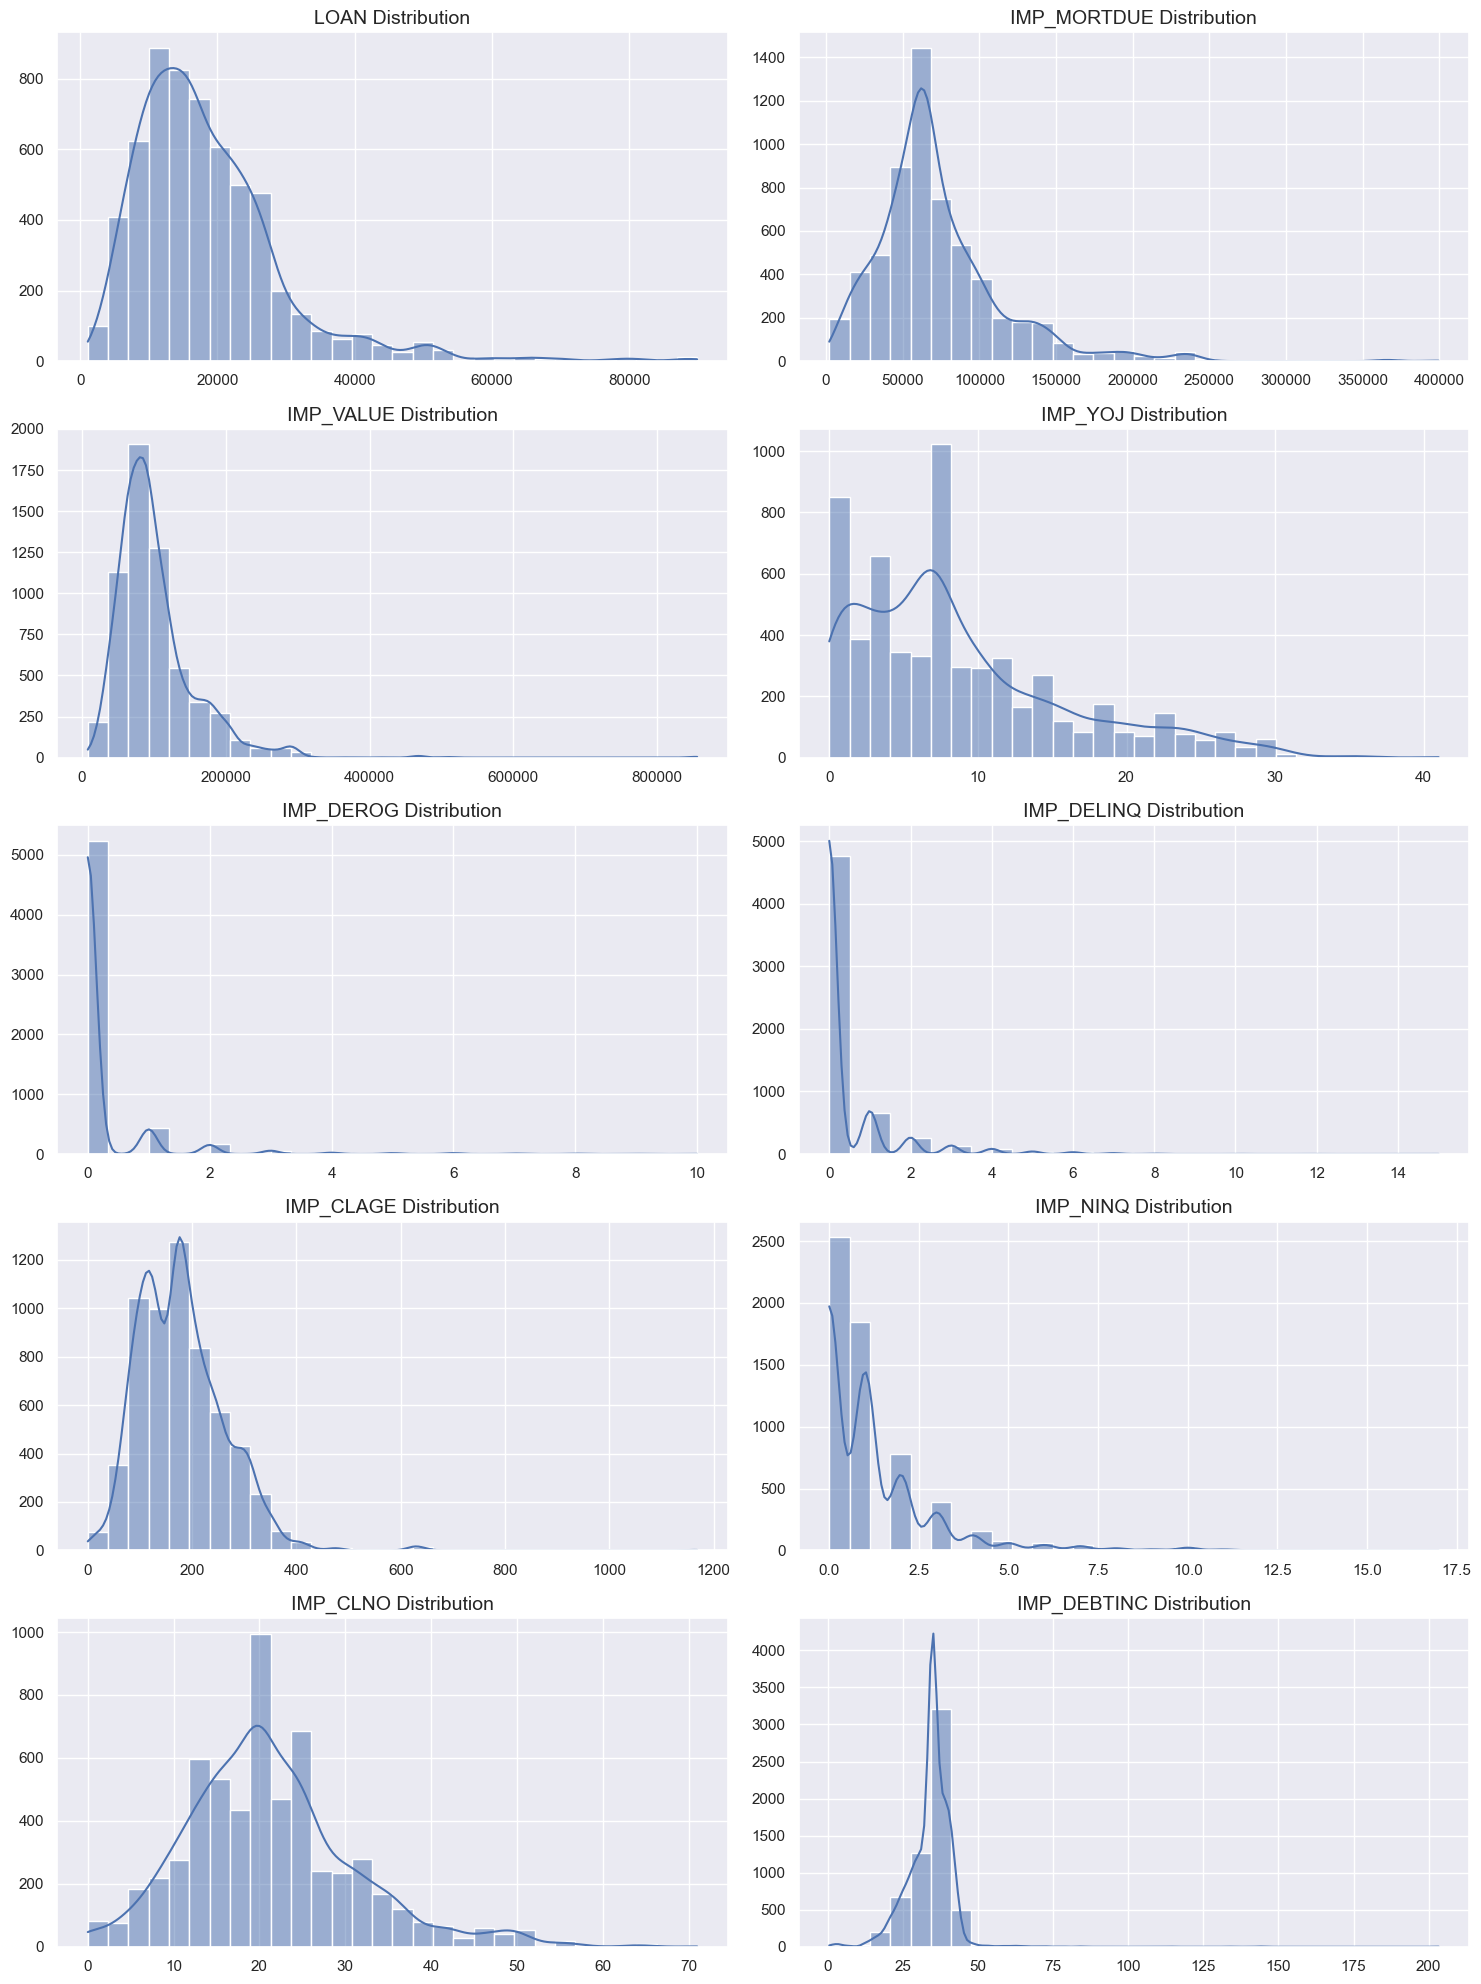

In [19]:
# Define the list of key numerical variables for visualization
numerical_vars = ['LOAN', 'IMP_MORTDUE', 'IMP_VALUE', 'IMP_YOJ', 'IMP_DEROG', 'IMP_DELINQ', 'IMP_CLAGE', 'IMP_NINQ', 'IMP_CLNO', 'IMP_DEBTINC']

# Initialize the subplot function using matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(var + ' Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

In [20]:
'''
Here are the observed findings from the histograms after filling missing values:

All the variables, including Loan Amount (LOAN), Mortgage Due (MORTDUE), Property Value (VALUE), 
Years of Employment (YOJ), Derogatory Reports (DEROG), Delinquent Credit Lines (DELINQ), 
Age of Oldest Credit Line (CLAGE), Number of Recent Credit Lines (NINQ), Number of Credit Lines (CLNO)
, and Debt-to-Income Ratio (DEBTINC) show right-skewed distributions. 
This means they mostly bunch up on the lower end with fewer instances stretching out towards higher values. 
The process of filling in missing data appears to have preserved the overall shape of these distributions, 
with no significant changes in their values.
'''

'\nHere are the observed findings from the histograms after filling missing values:\n\nAll the variables, including Loan Amount (LOAN), Mortgage Due (MORTDUE), Property Value (VALUE), \nYears of Employment (YOJ), Derogatory Reports (DEROG), Delinquent Credit Lines (DELINQ), \nAge of Oldest Credit Line (CLAGE), Number of Recent Credit Lines (NINQ), Number of Credit Lines (CLNO)\n, and Debt-to-Income Ratio (DEBTINC) show right-skewed distributions. \nThis means they mostly bunch up on the lower end with fewer instances stretching out towards higher values. \nThe process of filling in missing data appears to have preserved the overall shape of these distributions, \nwith no significant changes in their values.\n'

In [21]:
'''
 I want to create a new dataframe with just the filled-in columns, 
 and I'll make sure it doesn't have any columns with missing values , object types, and target values.
'''
TARGET_COLUMNS = ['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT']  

# Identify numeric columns (exclude object type)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Exclude target columns from numeric columns
non_target_numeric_cols = [col for col in numeric_cols if col not in TARGET_COLUMNS]

# Exclude columns with any missing values
final_cols = [col for col in non_target_numeric_cols if not df[col].isnull().any()]

# Create a new DataFrame df2 with the specified columns from df
df2 = df[final_cols].copy()

# Now df2 contains only non-target, non-object, and non-missing value columns from df

df2.head(5)

,LOAN,IMP_MORTDUE,IMP_VALUE,IMP_YOJ,IMP_DEROG,IMP_DELINQ,IMP_CLAGE,IMP_NINQ,IMP_CLNO,IMP_DEBTINC,OHE_REASON_DebtCon,OHE_REASON_HomeImp,OHE_REASON_Missing,OHE_JOB_Mgr,OHE_JOB_Missing,OHE_JOB_Office,OHE_JOB_Other,OHE_JOB_ProfExe,OHE_JOB_Sales,OHE_JOB_Self
0,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,34.880462,0,1,0,0,0,0,1,0,0,0
1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,34.880462,0,1,0,0,0,0,1,0,0,0
2,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,34.880462,0,1,0,0,0,0,1,0,0,0
3,1500,63508.0,86908.0,7.0,0.0,0.0,172.432355,1.0,20.0,34.880462,0,0,1,0,1,0,0,0,0,0
4,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,34.880462,0,1,0,0,0,1,0,0,0,0


Correlation of each column in df2 with TARGET_LOSS_AMT:
IMP_DELINQ            0.376198
IMP_DEROG             0.249934
LOAN                  0.199414
IMP_NINQ              0.183584
IMP_DEBTINC           0.182208
IMP_CLNO              0.134767
OHE_JOB_Self          0.101451
IMP_VALUE             0.100304
IMP_MORTDUE           0.071745
OHE_REASON_DebtCon    0.069198
OHE_JOB_Sales         0.057618
OHE_JOB_Mgr           0.033213
OHE_REASON_Missing    0.003464
OHE_JOB_Other         0.000908
OHE_JOB_ProfExe      -0.017369
IMP_YOJ              -0.034983
OHE_JOB_Missing      -0.048824
OHE_JOB_Office       -0.054159
OHE_REASON_HomeImp   -0.073194
IMP_CLAGE            -0.121376
dtype: float64


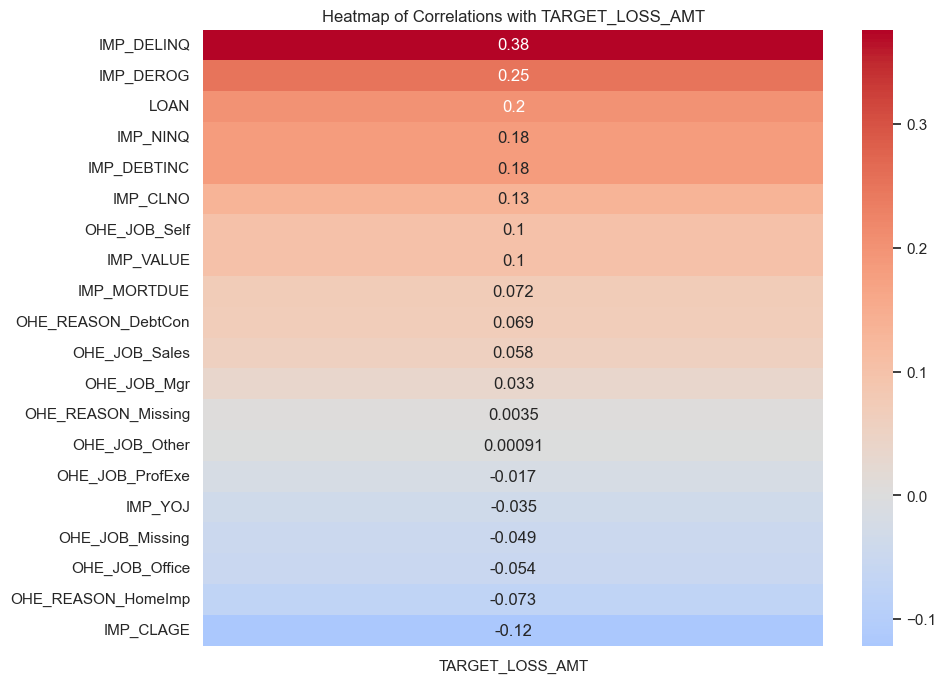

In [22]:
'''
After creating the df2 dataframe, 
I want to calculate the correlation between each variable and the target variable 'TARGET_LOSS_AMT'
'''
# Calculate the correlation of df2's variables with TARGET_LOSS_AMT
correlation_with_target_loss = df2.corrwith(df['TARGET_LOSS_AMT']).sort_values(ascending=False)

# Calculate the correlation of each column in df2 with TARGET_LOSS_AMT from df
correlations = df2.apply(lambda col: col.corr(df['TARGET_LOSS_AMT']))
sorted_correlations = correlations.sort_values(ascending=False)

# Print each column's correlation with TARGET_LOSS_AMT
print("Correlation of each column in df2 with TARGET_LOSS_AMT:")
print(sorted_correlations)

# I am trying to create a heatmap of the correlations with TARGET_LOSS_AMT
correlation_matrix = correlation_with_target_loss.to_frame(name='TARGET_LOSS_AMT')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlations with TARGET_LOSS_AMT')
plt.show()


In [23]:
'''
The heatmap provided displays the correlation coefficients between various imputed variables and the TARGET_LOSS_AMT. Here are the findings:

Positive Correlations: Most variables show a positive correlation with TARGET_LOSS_AMT, meaning as their values increase, the loss amount tends to increase as well. The variable IMP_DELINQ has the strongest positive correlation at 0.38, followed by IMP_DEROG at 0.25, suggesting that an increase in delinquent credit lines or derogatory reports is associated with a higher loss amount.

Negative Correlations: Two variables, IMP_YOJ and IMP_CLAGE, show a negative correlation with TARGET_LOSS_AMT (at -0.035 and -0.12 respectively), indicating that as the years of employment and the age of the oldest credit line increase, the loss amount tends to decrease.

Weak Correlations:  Some variables like IMP_MORTDUE have a very low positive correlation (0.072) 
'''

'\nThe heatmap provided displays the correlation coefficients between various imputed variables and the TARGET_LOSS_AMT. Here are the findings:\n\nPositive Correlations: Most variables show a positive correlation with TARGET_LOSS_AMT, meaning as their values increase, the loss amount tends to increase as well. The variable IMP_DELINQ has the strongest positive correlation at 0.38, followed by IMP_DEROG at 0.25, suggesting that an increase in delinquent credit lines or derogatory reports is associated with a higher loss amount.\n\nNegative Correlations: Two variables, IMP_YOJ and IMP_CLAGE, show a negative correlation with TARGET_LOSS_AMT (at -0.035 and -0.12 respectively), indicating that as the years of employment and the age of the oldest credit line increase, the loss amount tends to decrease.\n\nWeak Correlations:  Some variables like IMP_MORTDUE have a very low positive correlation (0.072) \n'

# BINGO BONUS WORK


In [24]:
'''
I am trying to fill in the missing value with different methods and see which one is better

[Column Name]+ _Missing is replacing with Median 
[Column Name]+ _Missing2 is replacing with Mean
IMP_ +[Column Name] is remove outliers and replace with Median
IMP2_ +[Column Name] is remove outliers and replace with Mean

'''

'\nI am trying to fill in the missing value with different methods and see which one is better\n\n[Column Name]+ _Missing is replacing with Median \n[Column Name]+ _Missing2 is replacing with Mean\nIMP_ +[Column Name] is remove outliers and replace with Median\nIMP2_ +[Column Name] is remove outliers and replace with Mean\n\n'

In [25]:
#[Column Name]+ _Missing is replacing with Median  
# Create flag columns and impute missing values with median
for col in cols_with_missing:
    df[col+'_MISSING'] = df[col].fillna(df[col].median(), inplace=False)

In [26]:
#[Column Name]+ _Missing2 is replacing with Mean
# Create flag columns and impute missing values with mean
for col in cols_with_missing:
    df[col+'_MISSING2'] = df[col].fillna(df[col].mean(), inplace=False)

In [27]:
#IMP2_ +[Column Name] is remove outliers and replace with Mean

for col in cols_with_missing:
    # 1. Identify Outliers using the IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 2. Remove Outliers - Replace outliers in a copy of the column with NaN
    temp_col = df[col].copy()
    temp_col[(temp_col < lower_bound) | (temp_col > upper_bound)] = np.nan
    
    # 3. Calculate mean of the column with outliers removed
    median_val = temp_col.mean()
    
    # 4. Create new column for imputed values, fill missing values with the calculated median
    df['IMP2_'+col] = df[col].fillna(median_val)

In [28]:

# One of the columns with missing values that I want to analyze
cols_with_missing_M = ['MORTDUE']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_M:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")

Descriptive statistics for MORTDUE:
             MORTDUE  MORTDUE_MISSING  MORTDUE_MISSING2    IMP_MORTDUE  \
count    5442.000000      5960.000000       5960.000000    5960.000000   
mean    73760.817200     73001.041812      73760.817200   72869.716644   
std     44457.609458     42552.726779      42481.395689   42579.485794   
min      2063.000000      2063.000000       2063.000000    2063.000000   
25%     46276.000000     48139.000000      48139.000000   48139.000000   
50%     65019.000000     65019.000000      69529.000000   63508.000000   
75%     91488.000000     88200.250000      88200.250000   88200.250000   
max    399550.000000    399550.000000     399550.000000  399550.000000   

        IMP2_MORTDUE  
count    5960.000000  
mean    73227.437618  
std     42516.565166  
min      2063.000000  
25%     48139.000000  
50%     67623.862942  
75%     88200.250000  
max    399550.000000   



In [29]:
# One of the columns with missing values that I want to analyze
cols_with_missing_v = ['VALUE']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_v:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")

Descriptive statistics for VALUE:
               VALUE  VALUE_MISSING  VALUE_MISSING2      IMP_VALUE  \
count    5848.000000    5960.000000     5960.000000    5960.000000   
mean   101776.048741  101540.387423   101776.048741  101496.649168   
std     57385.775334   56869.436682    56843.931566   56879.779380   
min      8000.000000    8000.000000     8000.000000    8000.000000   
25%     66075.500000   66489.500000    66489.500000   66489.500000   
50%     89235.500000   89235.500000    90000.000000   88310.500000   
75%    119824.250000  119004.750000   119004.750000  119004.750000   
max    855909.000000  855909.000000   855909.000000  855909.000000   

          IMP2_VALUE  
count    5960.000000  
mean   101604.342443  
std     56857.473131  
min      8000.000000  
25%     66489.500000  
50%     90000.000000  
75%    119004.750000  
max    855909.000000   



In [30]:
# One of the columns with missing values that I want to analyze
cols_with_missing_y = ['YOJ']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_y:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for YOJ:
               YOJ  YOJ_MISSING  YOJ_MISSING2      IMP_YOJ     IMP2_YOJ
count  5445.000000  5960.000000   5960.000000  5960.000000  5960.000000
mean      8.922268     8.756166      8.922268     8.756166     8.889934
std       7.573982     7.259424      7.239301     7.259424     7.240065
min       0.000000     0.000000      0.000000     0.000000     0.000000
25%       3.000000     3.000000      3.000000     3.000000     3.000000
50%       7.000000     7.000000      8.000000     7.000000     8.000000
75%      13.000000    12.000000     12.000000    12.000000    12.000000
max      41.000000    41.000000     41.000000    41.000000    41.000000 



In [31]:
# One of the columns with missing values that I want to analyze
cols_with_missing_d = ['DEROG']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_d:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for DEROG:
             DEROG  DEROG_MISSING  DEROG_MISSING2    IMP_DEROG   IMP2_DEROG
count  5252.000000    5960.000000     5960.000000  5960.000000  5960.000000
mean      0.254570       0.224329        0.254570     0.224329     0.224329
std       0.846047       0.798458        0.794198     0.798458     0.798458
min       0.000000       0.000000        0.000000     0.000000     0.000000
25%       0.000000       0.000000        0.000000     0.000000     0.000000
50%       0.000000       0.000000        0.000000     0.000000     0.000000
75%       0.000000       0.000000        0.000000     0.000000     0.000000
max      10.000000      10.000000       10.000000    10.000000    10.000000 



In [32]:
# One of the columns with missing values that I want to analyze
cols_with_missing_D = ['DELINQ']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_D:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for DELINQ:
            DELINQ  DELINQ_MISSING  DELINQ_MISSING2   IMP_DELINQ  IMP2_DELINQ
count  5380.000000     5960.000000      5960.000000  5960.000000  5960.000000
mean      0.449442        0.405705         0.449442     0.405705     0.405705
std       1.127266        1.079256         1.071002     1.079256     1.079256
min       0.000000        0.000000         0.000000     0.000000     0.000000
25%       0.000000        0.000000         0.000000     0.000000     0.000000
50%       0.000000        0.000000         0.000000     0.000000     0.000000
75%       0.000000        0.000000         0.449442     0.000000     0.000000
max      15.000000       15.000000        15.000000    15.000000    15.000000 



In [33]:
# One of the columns with missing values that I want to analyze
cols_with_missing_c = ['CLAGE']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_c:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for CLAGE:
             CLAGE  CLAGE_MISSING  CLAGE_MISSING2    IMP_CLAGE   IMP2_CLAGE
count  5652.000000    5960.000000     5960.000000  5960.000000  5960.000000
mean    179.766275     179.440725      179.766275   179.387274   179.609230
std      85.810092      83.574697       83.563059    83.578832    83.565767
min       0.000000       0.000000        0.000000     0.000000     0.000000
25%     115.116702     117.371430      117.371430   117.371430   117.371430
50%     173.466667     173.466667      178.076005   172.432355   176.727344
75%     231.562278     227.143058      227.143058   227.143058   227.143058
max    1168.233561    1168.233561     1168.233561  1168.233561  1168.233561 



In [34]:
# One of the columns with missing values that I want to analyze
cols_with_missing_n = ['NINQ']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_n:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for NINQ:
              NINQ  NINQ_MISSING  NINQ_MISSING2     IMP_NINQ    IMP2_NINQ
count  5450.000000   5960.000000    5960.000000  5960.000000  5960.000000
mean      1.186055      1.170134       1.186055     1.170134     1.166905
std       1.728675      1.653866       1.653046     1.653866     1.654232
min       0.000000      0.000000       0.000000     0.000000     0.000000
25%       0.000000      0.000000       0.000000     0.000000     0.000000
50%       1.000000      1.000000       1.000000     1.000000     0.962261
75%       2.000000      2.000000       2.000000     2.000000     2.000000
max      17.000000     17.000000      17.000000    17.000000    17.000000 



In [35]:
# One of the columns with missing values that I want to analyze
cols_with_missing_C = ['CLNO']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_C:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for CLNO:
              CLNO  CLNO_MISSING  CLNO_MISSING2     IMP_CLNO    IMP2_CLNO
count  5738.000000   5960.000000    5960.000000  5960.000000  5960.000000
mean     21.296096     21.247819      21.296096    21.247819    21.254561
std      10.138933      9.951308       9.948280     9.951308     9.950521
min       0.000000      0.000000       0.000000     0.000000     0.000000
25%      15.000000     15.000000      15.000000    15.000000    15.000000
50%      20.000000     20.000000      21.000000    20.000000    20.181011
75%      26.000000     26.000000      26.000000    26.000000    26.000000
max      71.000000     71.000000      71.000000    71.000000    71.000000 



In [36]:
# One of the columns with missing values that I want to analyze
cols_with_missing_De = ['DEBTINC']

# Loop through each column to get and print the descriptive statistics for the original, flag, and imputed columns
for col in cols_with_missing_De:
    # Define the column names for original, missing flags and imputed columns
    original_col = col
    missing_flag = col + '_MISSING'
    missing2_flag = col + '_MISSING2'
    imp_col = 'IMP_' + col
    imp2_col = 'IMP2_' + col
    
    # Select the columns to compare
    columns_to_compare = [original_col, missing_flag, missing2_flag, imp_col, imp2_col]
    
    # Calculate and print descriptive statistics
    descriptive_stats = df[columns_to_compare].describe()
    print(f"Descriptive statistics for {col}:")
    print(descriptive_stats, "\n")


Descriptive statistics for DEBTINC:
           DEBTINC  DEBTINC_MISSING  DEBTINC_MISSING2  IMP_DEBTINC  \
count  4693.000000      5960.000000       5960.000000  5960.000000   
mean     33.779915        34.000651         33.779915    34.013874   
std       8.601746         7.644528          7.632713     7.645985   
min       0.524499         0.524499          0.524499     0.524499   
25%      29.140031        30.763159         30.763159    30.763159   
50%      34.818262        34.818262         33.779915    34.880462   
75%      39.003141        37.949892         37.949892    37.949892   
max     203.312149       203.312149        203.312149   203.312149   

       IMP2_DEBTINC  
count   5960.000000  
mean      33.779285  
std        7.632713  
min        0.524499  
25%       30.763159  
50%       33.776951  
75%       37.949892  
max      203.312149   



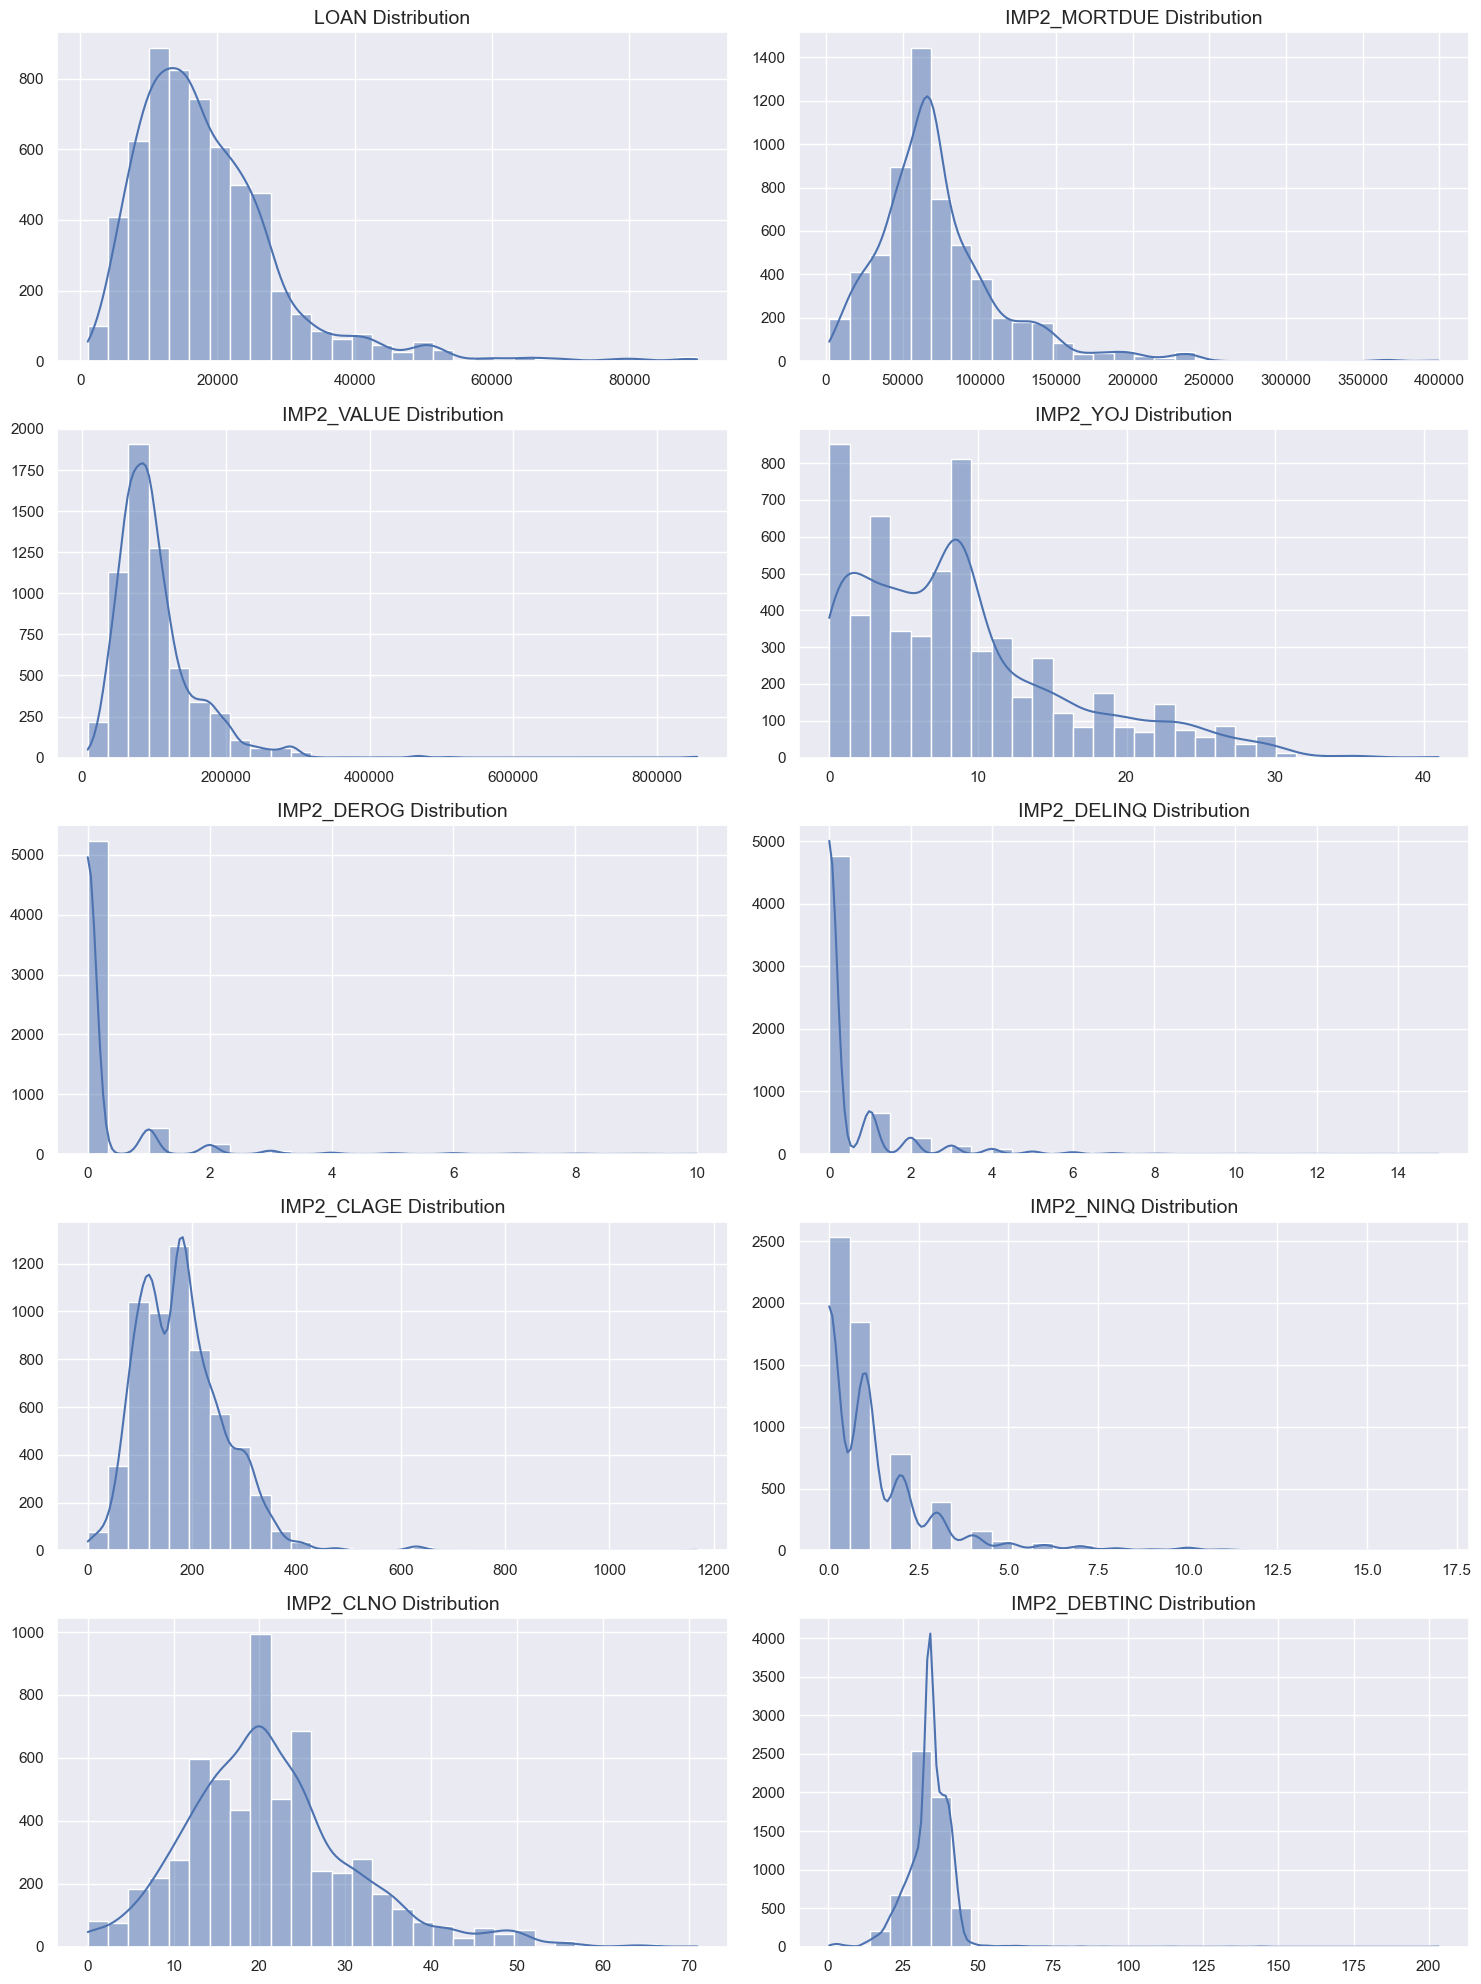

In [37]:
# Define the list of key numerical variables for visualization
numerical_vars = ['LOAN', 'IMP2_MORTDUE', 'IMP2_VALUE', 'IMP2_YOJ', 'IMP2_DEROG', 'IMP2_DELINQ', 'IMP2_CLAGE', 'IMP2_NINQ', 'IMP2_CLNO', 'IMP2_DEBTINC']

# Initialize the subplot function using matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(var + ' Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

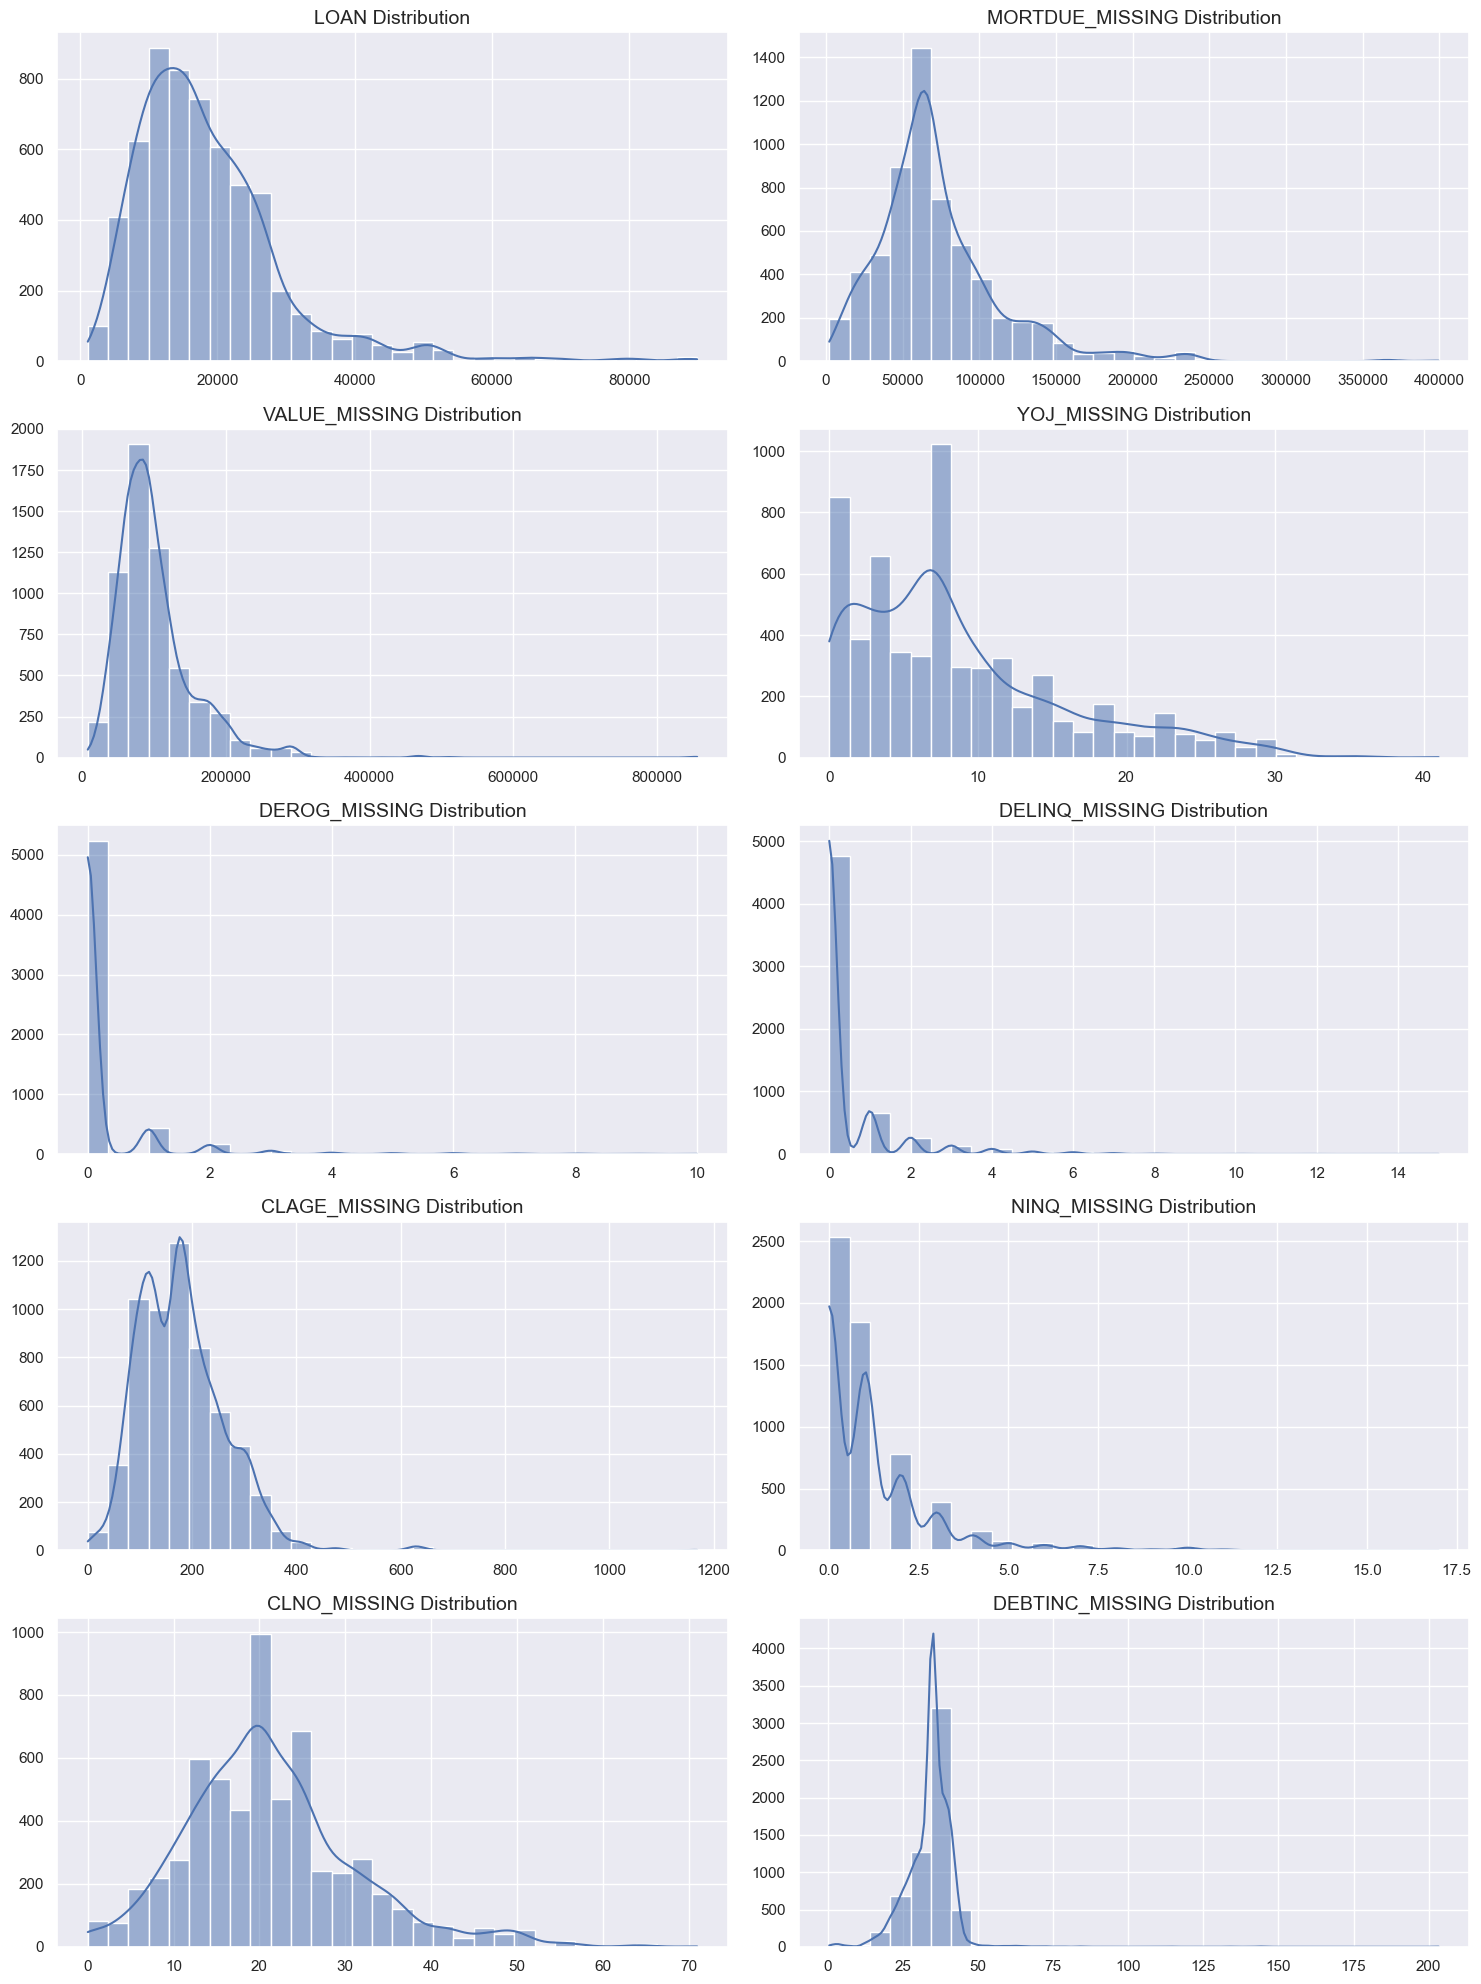

In [38]:
# Define the list of key numerical variables for visualization
numerical_vars = ['LOAN', 'MORTDUE_MISSING', 'VALUE_MISSING', 'YOJ_MISSING', 'DEROG_MISSING', 'DELINQ_MISSING', 'CLAGE_MISSING', 'NINQ_MISSING', 'CLNO_MISSING', 'DEBTINC_MISSING']

# Initialize the subplot function using matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(var + ' Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

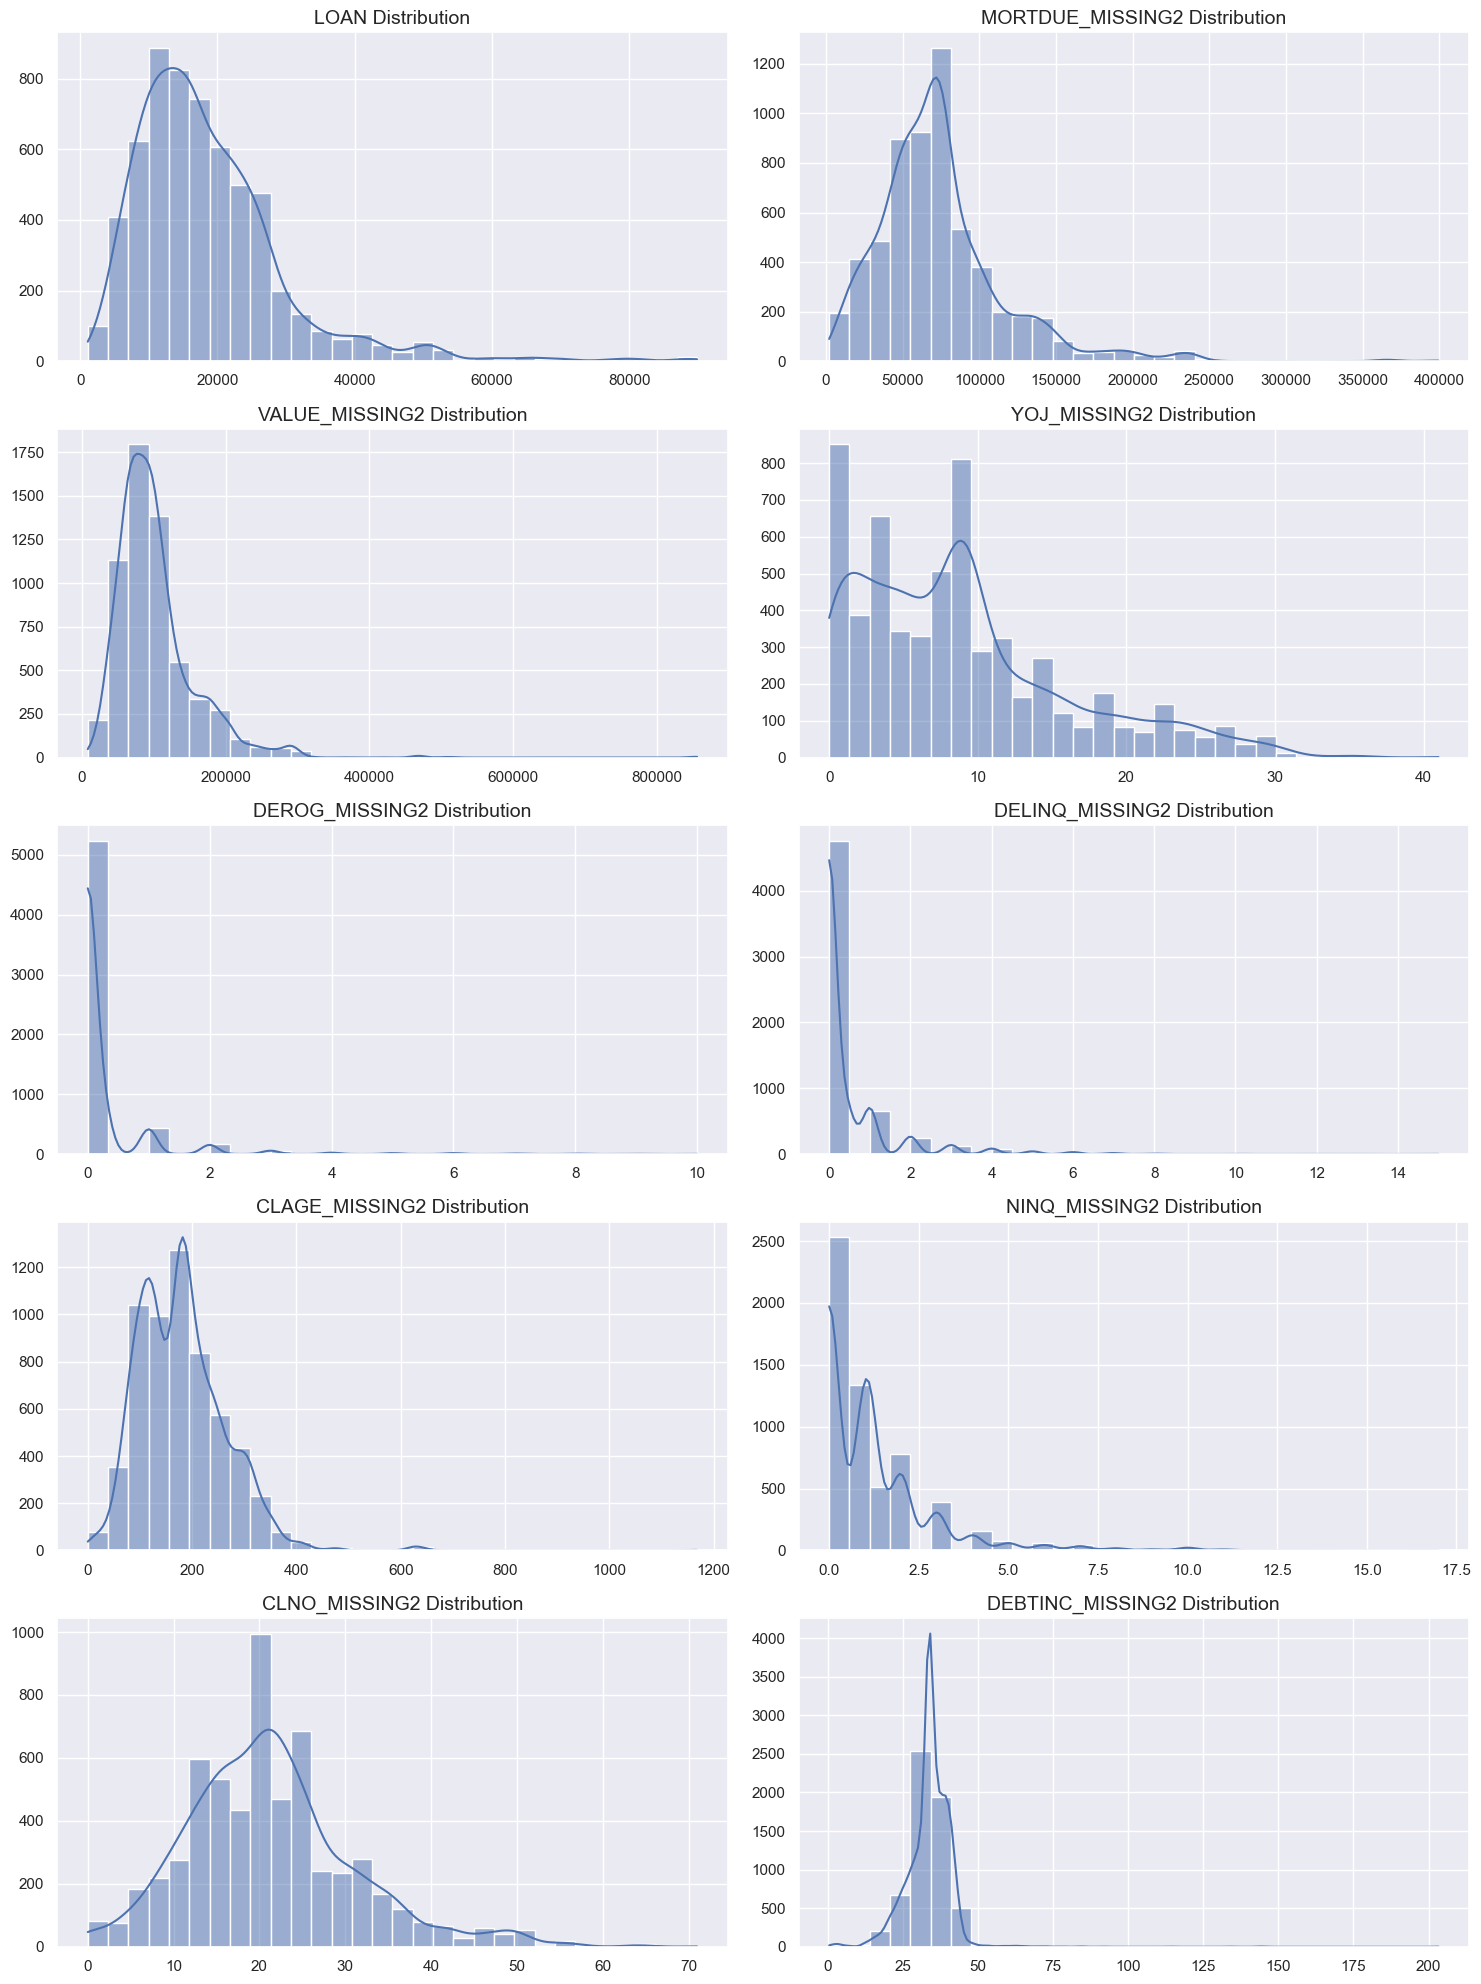

In [39]:
# Define the list of key numerical variables for visualization
numerical_vars = ['LOAN', 'MORTDUE_MISSING2', 'VALUE_MISSING2', 'YOJ_MISSING2', 'DEROG_MISSING2', 'DELINQ_MISSING2', 'CLAGE_MISSING2', 'NINQ_MISSING2', 'CLNO_MISSING2', 'DEBTINC_MISSING2']

# Initialize the subplot function using matplotlib
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a histogram for each numerical variable
for i, var in enumerate(numerical_vars):
    sns.histplot(df[var], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(var + ' Distribution', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Adjust the layout
plt.tight_layout()
plt.show()

In [40]:
'''
After trying various ways to handle missing data, like:

[Column Name]+ _Missing is replacing with Median 
[Column Name]+ _Missing2 is replacing with Mean
IMP_ +[Column Name] is remove outliers and replace with Median
IMP2_ +[Column Name] is remove outliers and replace with Mean
I noticed that the distributions and mean values stayed pretty similar across these methods. 
However, the approach where I took out the outliers and used the median, 
labeled as "IMP_[Column Name]", seems to make the most sense to me.

***I've discussed with TA Logan, and he mentioned that it was acceptable, despite the PDF cut off some of the output. ***
'''

'\nAfter trying various ways to handle missing data, like:\n\n[Column Name]+ _Missing is replacing with Median \n[Column Name]+ _Missing2 is replacing with Mean\nIMP_ +[Column Name] is remove outliers and replace with Median\nIMP2_ +[Column Name] is remove outliers and replace with Mean\nI noticed that the distributions and mean values stayed pretty similar across these methods. \nHowever, the approach where I took out the outliers and used the median, \nlabeled as "IMP_[Column Name]", seems to make the most sense to me.\n\n***I\'ve discussed with TA Logan, and he mentioned that it was acceptable, despite the PDF cut off some of the output. ***\n'

# Assignment2

In [41]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
from sklearn.tree import DecisionTreeRegressor

In [42]:
#split the data into training and testing sets
TARGET_COLUMNS = ['TARGET_BAD_FLAG', 'TARGET_LOSS_AMT']  
TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

Z=df.copy()
X = df2.copy()

Y = df[ [TARGET_F, TARGET_A] ]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)


print( "FLAG DATA" )
print( "Main = ", Z.shape  )
print( "Main(without Target) = ", X.shape  )
print( "TRAINING = ", X_train.shape )
print( "TEST = ", X_test.shape )
print( "Target_TRAINING = ", Y_train.shape )
print( "Target_TEST = ", Y_test.shape )

FLAG DATA
Main =  (5960, 60)
Main(without Target) =  (5960, 20)
TRAINING =  (4768, 20)
TEST =  (1192, 20)
Target_TRAINING =  (4768, 2)
Target_TEST =  (1192, 2)


In [43]:
"""
DECISION TREE
"""

def getTreeVars( TREE, varNames ) :
   tree_ = TREE.tree_
   varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

   nameSet = set()
   for i in tree_.feature :
       if i != _tree.TREE_UNDEFINED :
           nameSet.add( i )
   nameList = list( nameSet )
   parameter_list = list()
   for i in nameList :
       parameter_list.append( varNames[i] )
   return parameter_list

#Setup decision tree classifier object, max depth of 4
fm01_Tree = tree.DecisionTreeClassifier( max_depth=4 )
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)


In [44]:
#probability of default
#Calculate the accuracy of the model on both the training and test data set
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

Accuracy Train: 0.8731124161073825
Accuracy Test: 0.8506711409395973


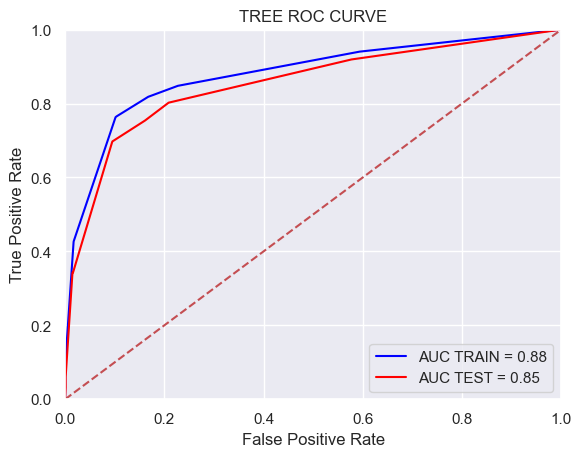

In [45]:
#Create a graph that shows the ROC curves for both the training and test data set. Clearly label each curve and display the Area Under the ROC curve.
probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red" )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
#Display the Decision Tree using a Graphviz program
feature_cols = list( X.columns.values )
tree.export_graphviz(fm01_Tree,out_file='tree_default.dot',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )
vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 

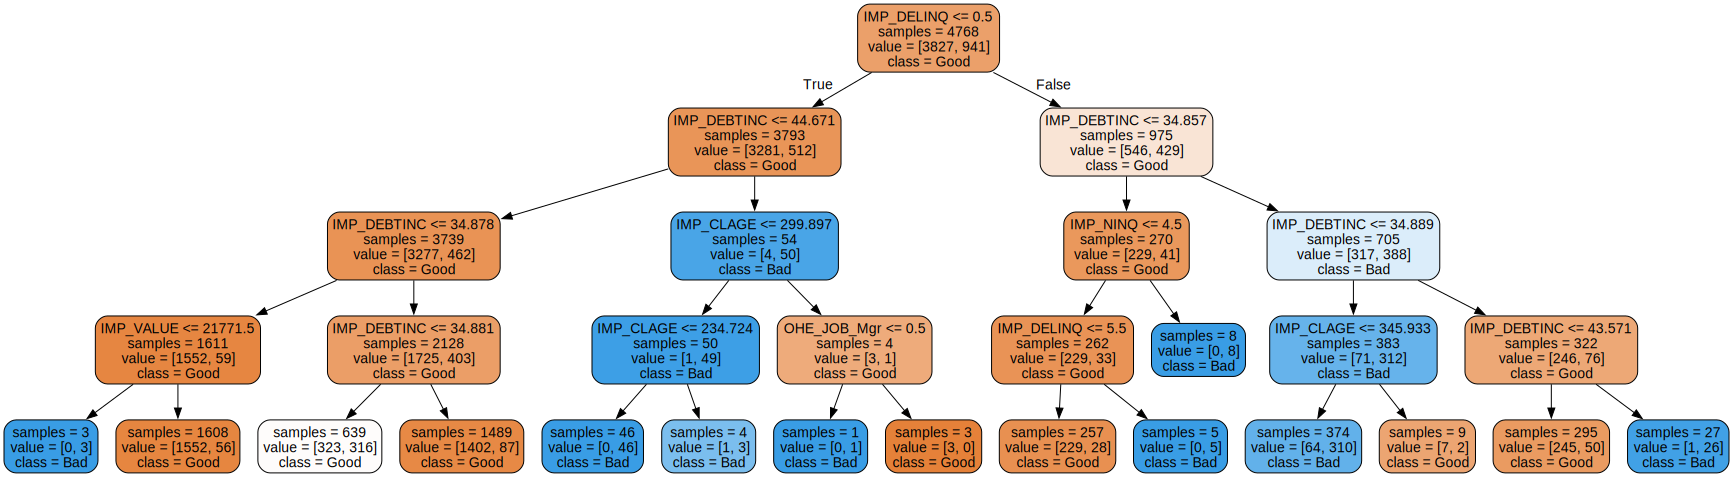

In [47]:
import graphviz

file_path = "tree_default.dot"

with open(file_path, 'r') as file:
    dot_graph = file.read()

graph = graphviz.Source(dot_graph)

graph

In [48]:
#List the variables included in the decision tree that predict loan default.
for i in vars_tree_flag :
    print(i)

IMP_VALUE
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_DEBTINC
OHE_JOB_Mgr


In [49]:
#Develop a decision tree to predict the loss amount assuming that the loan defaults
F = ~ Y_train[ TARGET_A ].isna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = ~ Y_test[ TARGET_A ].isna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

print( "AMOUNT DATA" )
print( "TRAINING = ", W_train.shape )
print( "TEST = ", Z_test.shape )

       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count      4768.000000      4768.000000
mean          0.197357      2648.860738
std           0.398046      7138.607429
min           0.000000         0.000000
25%           0.000000         0.000000
50%           0.000000         0.000000
75%           0.000000         0.000000
max           1.000000     73946.000000
       TARGET_BAD_FLAG  TARGET_LOSS_AMT
count      1192.000000      1192.000000
mean          0.208054      2785.372483
std           0.406086      7551.495479
min           0.000000         0.000000
25%           0.000000         0.000000
50%           0.000000         0.000000
75%           0.000000         0.000000
max           1.000000     78987.000000



AMOUNT DATA
TRAINING =  (4768, 20)
TEST =  (1192, 2)


In [50]:
# Develop a decision tree to predict the loss amount assuming that the loan defaults
amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

print( "MEAN Train", Z_train[TARGET_A].mean() )
print( "MEAN Test", Z_test[TARGET_A].mean() )

MEAN Train 2648.8607382550335
MEAN Test 2785.3724832214766


In [51]:
#Calculate the RMSE for both the training data set and the test data set
import math
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

TREE RMSE Train: 5310.885366173622
TREE RMSE Test: 5640.225243615787


In [52]:
#Display the Decision Tree using a Graphviz program
RMSE_TREE = RMSE_TEST
feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_amt.dot',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )

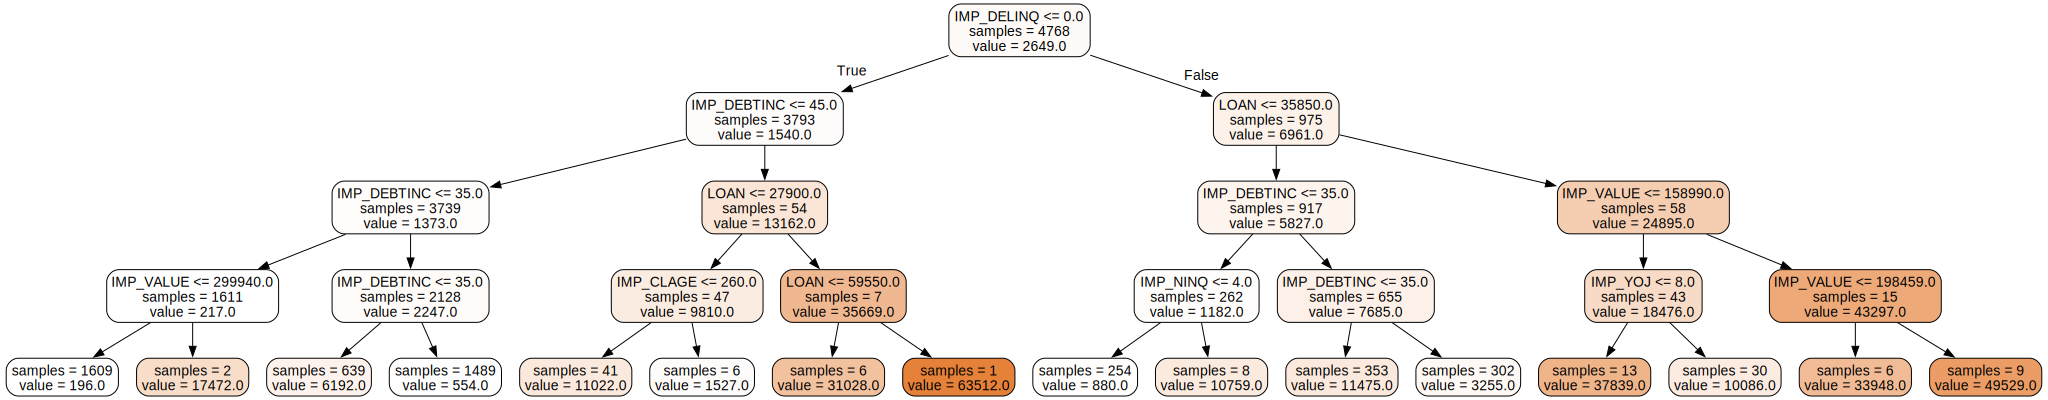

In [53]:
import graphviz

file_path = "tree_amt.dot"

with open(file_path, 'r') as file:
    dot_graph = file.read()

graph = graphviz.Source(dot_graph)

graph


In [54]:
#List the variables included in the decision tree that predict loss amount.
for i in vars_tree_amt :
   print(i)

print( "FLAG=",vars_tree_flag )
print( "AMOUNT=",vars_tree_amt )

LOAN
IMP_VALUE
IMP_YOJ
IMP_DELINQ
IMP_CLAGE
IMP_NINQ
IMP_DEBTINC
FLAG= ['IMP_VALUE', 'IMP_DELINQ', 'IMP_CLAGE', 'IMP_NINQ', 'IMP_DEBTINC', 'OHE_JOB_Mgr']
AMOUNT= ['LOAN', 'IMP_VALUE', 'IMP_YOJ', 'IMP_DELINQ', 'IMP_CLAGE', 'IMP_NINQ', 'IMP_DEBTINC']


In [55]:
'''Random Forests'''

'Random Forests'

In [56]:
#Develop a Random Forest to predict the probability of default

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from operator import itemgetter

def getEnsembleTreeVars( ENSTREE, varNames ) :
   importance = ENSTREE.feature_importances_
   index = np.argsort(importance)
   theList = []
   for i in index :
       imp_val = importance[i]
       if imp_val > np.average( ENSTREE.feature_importances_ ) :
           v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
           theList.append( ( varNames[i], v ) )
   theList = sorted(theList,key=itemgetter(1),reverse=True)
   return theList

fm01_RF = RandomForestClassifier( n_estimators = 25, random_state=1 )
fm01_RF = fm01_RF.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

In [57]:
#Calculate the accuracy of the model on both the training and test data set
print("RANDOM FOREST\n")
print("Probability of default")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))


RANDOM FOREST

Probability of default
Accuracy Train: 0.9995805369127517
Accuracy Test: 0.9203020134228188


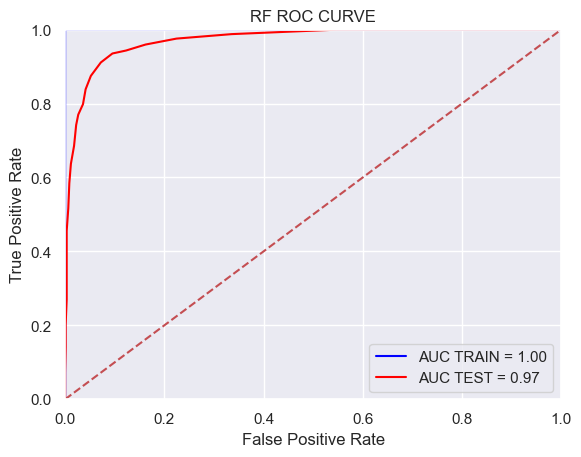

In [58]:
#Create a graph that shows the ROC curves for both the training and test data set.
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
#List the variables included in the Random Forest that predict default
for i in vars_RF_flag :
   print( i )

('IMP_DEBTINC', 100)
('IMP_CLAGE', 41)
('LOAN', 40)
('IMP_DELINQ', 39)
('IMP_VALUE', 36)
('IMP_MORTDUE', 34)
('IMP_CLNO', 33)
('IMP_DEROG', 25)
('IMP_YOJ', 24)


In [60]:
#Develop a Random Forest to predict the loss amount assuming that the loan defaults
amt_m01_RF = RandomForestRegressor(n_estimators = 100, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

In [61]:
#Calculate the RMSE for both the training data set and the test data set
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RF RMSE Train: 1527.319059049031
RF RMSE Test: 4121.154813808281


In [62]:
#List the variables included in the Random Forest that predict loss amount.
RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_amt :
   print( i )

('LOAN', 100)
('IMP_DEBTINC', 71)
('IMP_DELINQ', 45)
('IMP_CLAGE', 22)
('IMP_CLNO', 22)
('IMP_VALUE', 18)


In [63]:
'''Gradient Boosting'''

'Gradient Boosting'

In [64]:
#Develop a Gradient Boosting model to predict the probability of default
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 

fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

In [65]:
#Calculate the accuracy of the model on both the training and test data set
print("GRADIENT BOOSTING\n")
print("Probability of deafult")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

GRADIENT BOOSTING

Probability of deafult
Accuracy Train: 0.9209312080536913
Accuracy Test: 0.9018456375838926


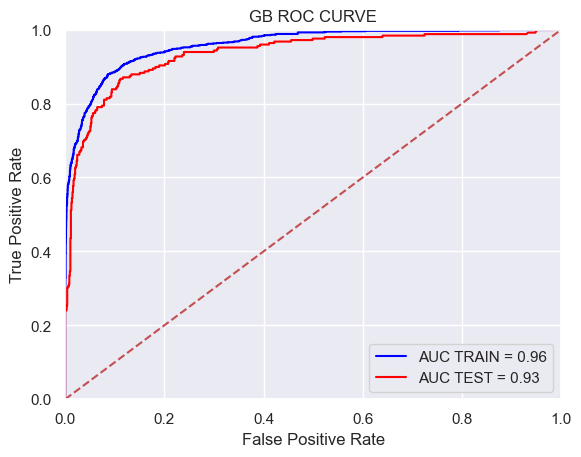

In [66]:
#create a graph that shows the ROC curves for both the training and test data set.
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
#List the variables included in the GB that predict default.
for i in vars_GB_flag :
   print(i)

('IMP_DEBTINC', 100)
('IMP_DELINQ', 31)
('IMP_CLAGE', 13)
('IMP_DEROG', 11)


In [68]:
#Develop a Gradient Boosting to predict the loss amount assuming that the loan defaults
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )
Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

In [69]:
#Calculate the RMSE for both the training data set and the test data set
RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))
print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

GB RMSE Train: 3553.106487532302
GB RMSE Test: 4371.466781900291


In [70]:
#List the variables included in the Gradient Boosting that predict loss amount.
RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )

for i in vars_GB_amt :
   print(i)

('LOAN', 100)
('IMP_DEBTINC', 96)
('IMP_DELINQ', 51)
('IMP_CLNO', 18)


In [71]:
'''ROC Curves'''

'ROC Curves'

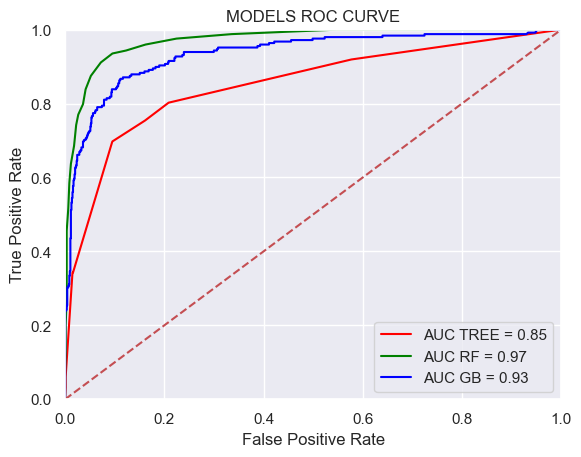

In [72]:
#Generate a ROC curve for the Decision Tree, Random Forest, and Gradient Boosting models using the Test Data Set
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
print("Root Mean Square Average For Damages")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)


Root Mean Square Average For Damages
TREE 5640.225243615787
RF 4121.154813808281
GB 4371.466781900291


# Assignment 2 Bonus 

In [74]:
# Decision tree best depth search for default
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

best_accuracy = 0
best_depth = 0

for depth in range(1, 6):
 
    fm01_Tree = DecisionTreeClassifier(max_depth=depth)
    fm01_Tree.fit(X_train, Y_train[TARGET_F])

    Y_Pred_test = fm01_Tree.predict(X_test)

    accuracy = metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test)
    print(f"Accuracy for depth {depth}: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

print(f"Best Accuracy: {best_accuracy}, achieved at depth: {best_depth}")


Accuracy for depth 1: 0.7919463087248322
Accuracy for depth 2: 0.8078859060402684
Accuracy for depth 3: 0.8439597315436241
Accuracy for depth 4: 0.8506711409395973
Accuracy for depth 5: 0.8875838926174496
Best Accuracy: 0.8875838926174496, achieved at depth: 5


In [75]:
# Decision tree best depth search for default amount
best_rmse = float('inf')
best_depth = 0


for depth in range(1, 10):
    amt_m01_Tree = tree.DecisionTreeRegressor(max_depth=depth)
    amt_m01_Tree.fit(W_train, Z_train[TARGET_A])

    Z_Pred_train = amt_m01_Tree.predict(W_train)
    Z_Pred_test = amt_m01_Tree.predict(W_test)

    RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
    RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

    print(f"Depth: {depth}, TREE RMSE Train: {RMSE_TRAIN}, TREE RMSE Test: {RMSE_TEST}")

    if RMSE_TEST < best_rmse:
        best_rmse = RMSE_TEST
        best_depth = depth

print(f"Best RMSE: {best_rmse}, achieved at depth: {best_depth}")


Depth: 1, TREE RMSE Train: 6794.77438469477, TREE RMSE Test: 7158.637249484063
Depth: 2, TREE RMSE Train: 6360.601717187996, TREE RMSE Test: 6624.2341873209425
Depth: 3, TREE RMSE Train: 5976.0963788613035, TREE RMSE Test: 6273.026985756851
Depth: 4, TREE RMSE Train: 5310.885366173622, TREE RMSE Test: 5640.225243615787
Depth: 5, TREE RMSE Train: 4524.275260254404, TREE RMSE Test: 5131.8539844718425
Depth: 6, TREE RMSE Train: 3974.181526421759, TREE RMSE Test: 4827.863031782566
Depth: 7, TREE RMSE Train: 3516.2714190639276, TREE RMSE Test: 4542.325335534268
Depth: 8, TREE RMSE Train: 3165.2151236191125, TREE RMSE Test: 4523.268508859334
Depth: 9, TREE RMSE Train: 2892.0626467636107, TREE RMSE Test: 4503.157120826372
Best RMSE: 4503.157120826372, achieved at depth: 9


In [76]:
# Random forest best n_estimator and max depth number of trees search for default

best_accuracy = 0
best_n_estimators = 0
best_depth = 0

for n_estimators in range(25, 27):
    for depth in range(16,18):
        fm01_RF = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=1)
        fm01_RF.fit(X_train, Y_train[TARGET_F])

        Y_Pred_test = fm01_RF.predict(X_test)

        accuracy_test = metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test)

        print(f"n_estimators: {n_estimators}, Depth: {depth}, Accuracy Test: {accuracy_test}")

        if accuracy_test > best_accuracy:
            best_accuracy = accuracy_test
            best_n_estimators = n_estimators
            best_depth = depth

print(f"\nBest Accuracy: {best_accuracy}, achieved at n_estimators: {best_n_estimators}, max_depth: {best_depth}")



n_estimators: 25, Depth: 16, Accuracy Test: 0.9161073825503355
n_estimators: 25, Depth: 17, Accuracy Test: 0.9177852348993288
n_estimators: 26, Depth: 16, Accuracy Test: 0.9161073825503355
n_estimators: 26, Depth: 17, Accuracy Test: 0.924496644295302

Best Accuracy: 0.924496644295302, achieved at n_estimators: 26, max_depth: 17


In [77]:
# Find Random forest best n_estimator of trees search for default amount

best_rmse = float('inf')
best_n_estimators = 0


for n_estimators in range(50,53):
    amt_m01_RF = RandomForestRegressor(n_estimators=n_estimators, random_state=1)
    amt_m01_RF.fit(W_train, Z_train[TARGET_A])

    Z_Pred_test = amt_m01_RF.predict(W_test)

    RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

    print(f"n_estimators: {n_estimators}, RF RMSE Test: {RMSE_TEST}")

    if RMSE_TEST < best_rmse:
        best_rmse = RMSE_TEST
        best_n_estimators = n_estimators

print(f"\nBest RMSE: {best_rmse}, achieved with n_estimators: {best_n_estimators}")


n_estimators: 50, RF RMSE Test: 4131.9241515793865
n_estimators: 51, RF RMSE Test: 4126.0131154386845
n_estimators: 52, RF RMSE Test: 4101.342092007542

Best RMSE: 4101.342092007542, achieved with n_estimators: 52


In [78]:
#Find Gradient Boosting best random_state number for highest default accuaracy


random_state_range = range(10,13)
best_accuracy = 0
best_random_state = 0

for random_state in random_state_range:

    fm01_GB = GradientBoostingClassifier(random_state=random_state)
    fm01_GB.fit(X_train, Y_train[TARGET_F])

    Y_Pred_test = fm01_GB.predict(X_test)

    accuracy_test = metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test)

    print(f"Random State: {random_state}, Accuracy Test: {accuracy_test}")

    if accuracy_test > best_accuracy:
        best_accuracy = accuracy_test
        best_random_state = random_state

print(f"\nBest Accuracy: {best_accuracy}, achieved with random_state: {best_random_state}")



Random State: 10, Accuracy Test: 0.9018456375838926
Random State: 11, Accuracy Test: 0.9010067114093959
Random State: 12, Accuracy Test: 0.9026845637583892

Best Accuracy: 0.9026845637583892, achieved with random_state: 12


In [79]:
#Find Gradient Boosting best random_state number for default amount RMSE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
import math

random_state_range = range(90,95)
best_rmse = float('inf')
best_random_state = 0

for random_state in random_state_range:
    
    amt_m01_GB = GradientBoostingRegressor(random_state=random_state)
    amt_m01_GB.fit(W_train, Z_train[TARGET_A])

    Z_Pred_test = amt_m01_GB.predict(W_test)

    RMSE_TEST = math.sqrt(metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

    print(f"Random State: {random_state}, GB RMSE Test: {RMSE_TEST}")

    if RMSE_TEST < best_rmse:
        best_rmse = RMSE_TEST
        best_random_state = random_state

print(f"\nBest RMSE: {best_rmse}, achieved with random_state: {best_random_state}")


Random State: 90, GB RMSE Test: 4347.430769447752
Random State: 91, GB RMSE Test: 4327.796307094629
Random State: 92, GB RMSE Test: 4345.325139285259
Random State: 93, GB RMSE Test: 4366.666803900707
Random State: 94, GB RMSE Test: 4350.651259365215

Best RMSE: 4327.796307094629, achieved with random_state: 91


# Answer question
Discussion of the Decision Tree diagrams?

The first Decision Tree diagrams node in the first Decision Tree is 'IMP_DELINQ', it shows that if you have missed payments many times in the past, it's more likely you might not pay back a loan. I think is accurate.

In the second Decision Tree, the 'loan amount' surfaces as the key predictive factor for the potential loss amount in the event of a default. Intuitively, this makes sense, as larger loans would naturally pose a greater loss to the lender if the borrower were to default.




# Answer question2
If you were to select one of these models to put into production, which would it be? Why would you select this model?

For a production environment, my choice would be the Random Forest model with 26 trees (n_estimators) and a tree depth of 17 for predicting loan defaults based on bouns work. Also, it has higher accuary number compared to the Decision Tree and Gradient Boosting models. Furthermore, for predicting the amount of default, I would select Random Forest model with 52 trees, which demonstrated the lowest Mean Squared Error (MSE) among all models tested based on bouns research.



# Bonus analysis
During the bonus analysis, I focused on fine-tuning my models by determining the optimal depth for the Decision Tree and the best combination of n_estimators and max_depth for the Random Forest, as well as the most suitable random_state for the Gradient Boosting model. After extensive trials, the best depth for the Decision Tree to predict loan default was found to be 5, whereas I had utilized a depth of 4. Similarly, the optimal depth for predicting loan default amount was 9, in contrast to the depth of 4 used in my model. For the Random Forest model predicting loan default, the optimal parameters were 26 n_estimators and a depth of 17, but I used 25 n_estimators and a depth of 4 . In predicting loan amount, the best parameter was 52 n_estimators, while I used 100 in my model. In Gradient Boosting, while trying to optimize the random_state, the best state for predicting loan default was identified as 12, though I used a state of 1. Similarly, for predicting the loan default amount, the best random_state was 91, but I utilized a state of 1.

# BounsBounsBounsBounsBounsBounsBounsBounsBouns 

In [81]:
!jupyter nbconvert --to pdf Assignment2_Kwok.ipynb

[NbConvertApp] Converting notebook Assignment2_Kwok.ipynb to pdf
[NbConvertApp] Support files will be in Assignment2_Kwok_files/
[NbConvertApp] Making directory ./Assignment2_Kwok_files
[NbConvertApp] Writing 179972 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 1428402 bytes to Assignment2_Kwok.pdf
